<a href="https://colab.research.google.com/github/AssyifaNF/Heart-Disease-Prediction/blob/master/AUTO_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings
warnings.filterwarnings('ignore')

In [2]:
get_ipython().system(' pip install pmdarima')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.1 MB/s eta 0:00:00


In [3]:
from pmdarima.arima import auto_arima

In [14]:
data = pd.read_csv("/content/data_keberangkatan_bus_akap.csv")

In [15]:
data.head()

,Periode,Keberangkatan
0,2017-01-01,35934
1,2017-02-01,43873
2,2017-03-01,50518
3,2017-04-01,48790
4,2017-05-01,44796


In [16]:
data.tail()

,Periode,Keberangkatan
72,2023-01-01,68774
73,2023-02-01,44098
74,2023-03-01,46530
75,2023-04-01,56100
76,2023-05-01,79581


In [17]:
data.dtypes

Periode           object
Keberangkatan      int64
dtype: object

In [18]:
#Convert the month column to datetime
data['Periode']=pd.to_datetime(data['Periode'])

In [19]:
data.dtypes

Periode           datetime64[ns]
Keberangkatan              int64
dtype: object

In [20]:
#Set the index of the Month
data.set_index('Periode',inplace=True)

In [21]:
data.head()

,Keberangkatan
Periode,
2017-01-01,35934
2017-02-01,43873
2017-03-01,50518
2017-04-01,48790
2017-05-01,44796


<Axes: xlabel='Periode'>

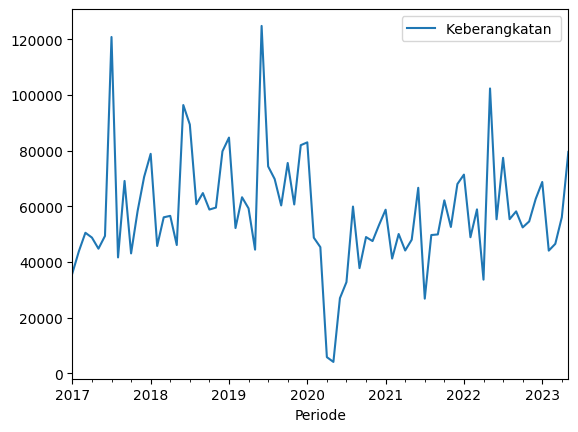

In [22]:
# To understand the pattern
data.plot()

In [23]:
#Testing for stationarity
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(data)

(0.1327778456231843, True)

In [24]:
#Spliting the dataset into train and test
train = data[:85]
test = data[-20:]

In [25]:
train.tail()

,Keberangkatan
Periode,
2023-01-01,68774
2023-02-01,44098
2023-03-01,46530
2023-04-01,56100
2023-05-01,79581


In [26]:
test.head()

,Keberangkatan
Periode,
2021-10-01,62175
2021-11-01,52596
2021-12-01,68038
2022-01-01,71423
2022-02-01,48919


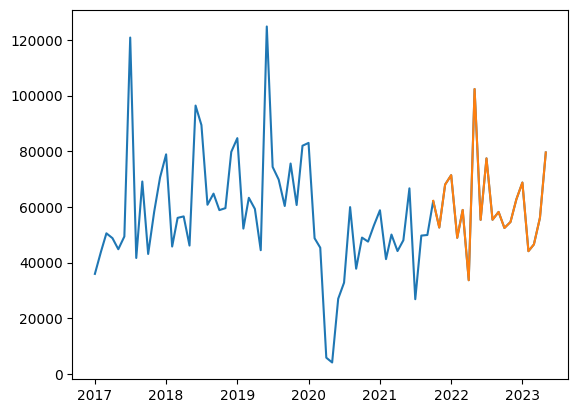

In [27]:
plt.plot(train)
plt.plot(test)

In [28]:
arima_model =  auto_arima(train,start_p=0, d=1, start_q=0,
                          max_p=5, max_d=5, max_q=5, start_P=0,
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=12, seasonal=True,
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1496.369, Time=0.12 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1463.790, Time=0.19 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1466.058, Time=0.36 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1471.796, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1464.517, Time=1.06 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1459.495, Time=1.50 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=1460.063, Time=0.61 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=1467.083, Time=1.38 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=1461.494, Time=0.64 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=1459.849, Time=0.33 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=1463.453, Time=0.99 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.36 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=1461.453, Time=0.59 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=1461.932, Time=0.58 sec
 ARIMA(0,1,1)(1,1,1)[12]

In [29]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   77
Model:             SARIMAX(1, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -725.748
Date:                              Sat, 16 Sep 2023   AIC                           1459.495
Time:                                      15:55:19   BIC                           1468.131
Sample:                                  01-01-2017   HQIC                          1462.897
                                       - 05-01-2023                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5789      0.138     -4.182      0.000      -0.850      -0.308
ar.S.L12       0.3118      0.229      1.360      0.174      -0.138       0.761
ma.S.L12      -0.8387      0.276     -3.043      0.002      -1.379      -0.298
sigma2      4.882e+08   1.14e-09   4.27e+17      0.000    4.88e+08    4.88e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                17.45
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                             0.67
Prob(H) (two-sided):                  0.62   Kurtosis:                         5.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.8e+32. Standard errors may be unstable.
"""

In [30]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 20),index=test.index)
prediction.columns = ['predicted_data']
prediction

,predicted_data
Periode,
2021-10-01,NaN
2021-11-01,NaN
2021-12-01,NaN
2022-01-01,NaN
2022-02-01,NaN
2022-03-01,NaN
2022-04-01,NaN
2022-05-01,NaN
2022-06-01,NaN


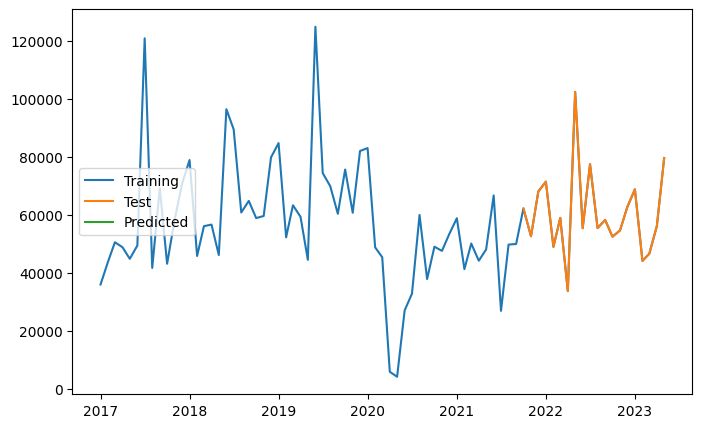

In [34]:
plt.figure(figsize=(8,5))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.legend(loc = 'center left')
plt.show()